5. K-MEANS FOR COMPRESSION

In [338]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

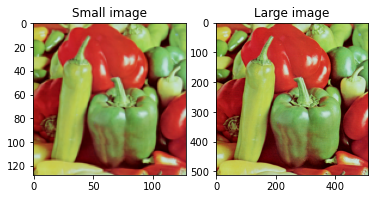

In [339]:
#S=imread('peppers-small.tiff') #Was causing data conversion error on imshow
S= np.load('peppers-small.npy')
L=np.load('peppers-large.npy')

plt.subplot(1,2,1)
plt.imshow(S)
plt.title('Small image')

plt.subplot(1,2,2)
plt.imshow(L)
plt.title('Large image')
plt.show()


#No. of clusters
K=16


In [340]:
def initial_cens(K,S):
    """
    To initialize the centroid values
    
    Args:
        K: Number of clusters
        S:Matrix of small image

    """
    
    m=S.shape[0]
    centroids=S[np.random.choice(m,K),np.random.choice(m,K),:]
    return centroids

In [341]:
def K_means(K,S):
    """
    K-means algorithm
    
    Args:
        K: Number of clusters
        S:Matrix of small image
    
    """
    centroids=initial_cens(K,S)
    
    m=S.shape[0]
    it=0
    eps=1e-3
    prev_J=new_J=None
    J_list=[]
    while it<300 and (prev_J is None or (abs(prev_J-new_J))>eps):
        prev_J=new_J
        centroid_dis=np.linalg.norm((S[:,:,None]-centroids),axis=3)

        min_dis_cen=np.argmin(centroid_dis,axis=2)
        min_dis=np.amin(centroid_dis,axis=2)
        new_J=np.sum((min_dis.reshape(m*m,1)),axis=0)

        centroids=[]
        for i in range(K):
            centroids.append(np.mean((S[np.where(min_dis_cen==i)[0],np.where(min_dis_cen==i)[1],:]),axis=0))
        centroids=np.array(centroids)
        it+=1
        J_list.append(new_J)
   
    plt.figure()
    plt.plot(J_list)
    plt.xlabel('Iterations')
    plt.ylabel('Distortion')
    plt.title('Convergence of distortion')
    plt.show()
    print(f'K-means converged after {it} iterations')
    return centroids,new_J



In [342]:
def compress(centroids,L,S):
    """
    To compress the image provided
    
    Args:
        centroids:Centroid of the pixels after convergence of K-means
        L:Matrix of large image
        S:Matrix of small image

    
    """
    
    centroid_dis_L=np.linalg.norm((L[:,:,None]-centroids),axis=3)
    min_dis_cen_L=np.argmin(centroid_dis_L,axis=2)

    L_new=centroids[min_dis_cen_L]
    L_new=np.array(L_new,dtype=int)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(L)
    plt.title('original large image')
    plt.subplot(1,2,2)
    plt.imshow(L_new)
    plt.title('compressed large image')
    plt.savefig('compressed_large_image.png')

    centroid_dis_S=np.linalg.norm((S[:,:,None]-centroids),axis=3)
    min_dis_cen_S=np.argmin(centroid_dis_S,axis=2)

    S_new=centroids[min_dis_cen_S]
    S_new=np.array(S_new,dtype=int)

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(S)
    plt.title('original small image')
    plt.subplot(1,2,2)
    plt.imshow(S_new)
    plt.title('compressed small image')
    plt.savefig('compressed_small_image.png')

                               

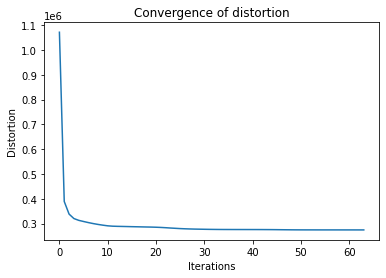

K-means converged after 64 iterations


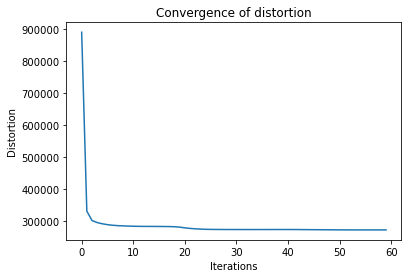

K-means converged after 60 iterations


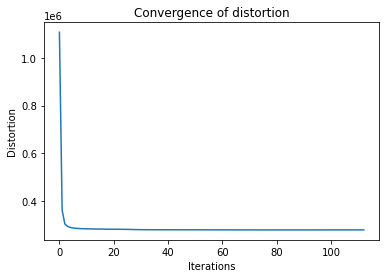

K-means converged after 113 iterations


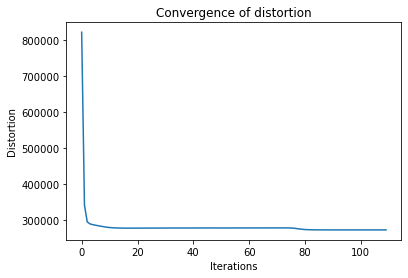

K-means converged after 110 iterations


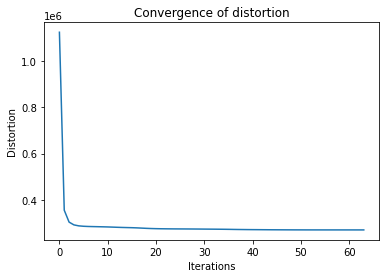

K-means converged after 64 iterations


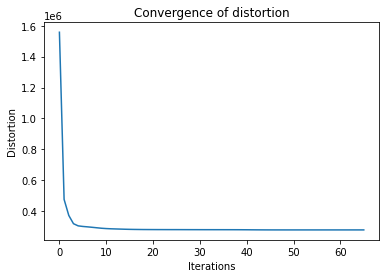

K-means converged after 66 iterations


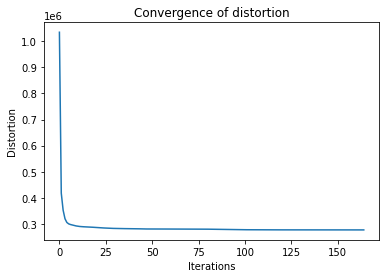

K-means converged after 165 iterations


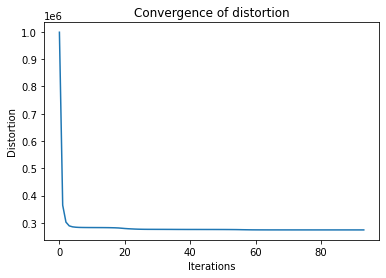

K-means converged after 94 iterations


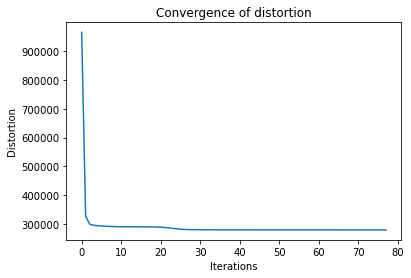

K-means converged after 78 iterations


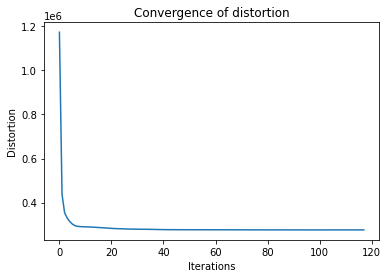

K-means converged after 118 iterations


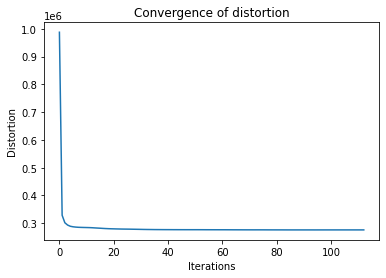

K-means converged after 113 iterations


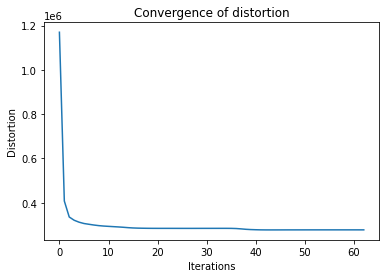

K-means converged after 63 iterations


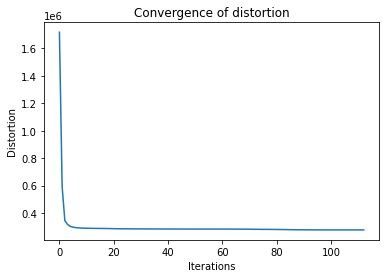

K-means converged after 113 iterations


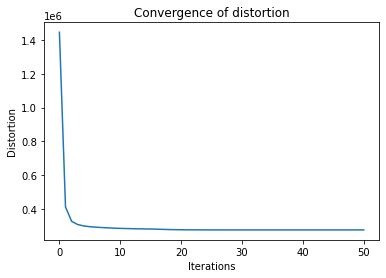

K-means converged after 51 iterations


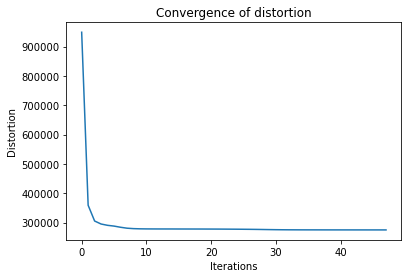

K-means converged after 48 iterations


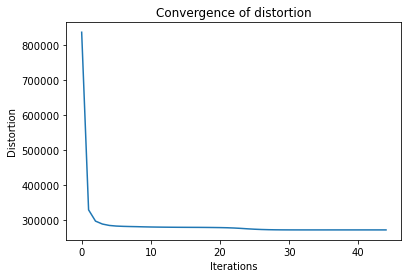

K-means converged after 45 iterations


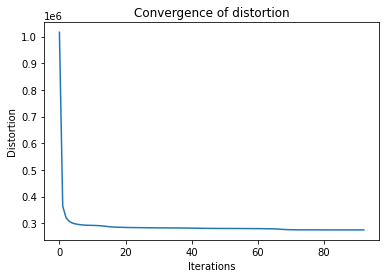

K-means converged after 93 iterations


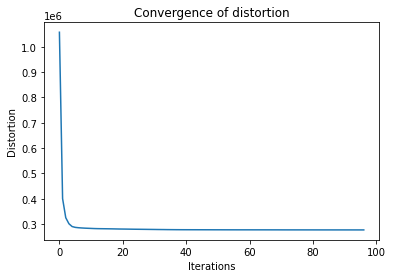

K-means converged after 97 iterations


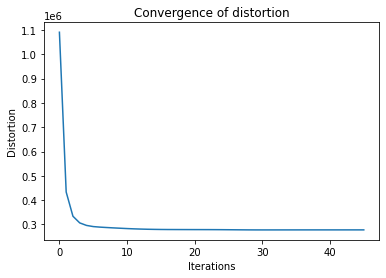

K-means converged after 46 iterations


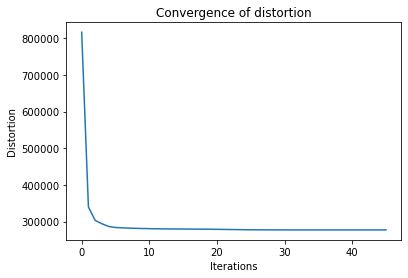

K-means converged after 46 iterations


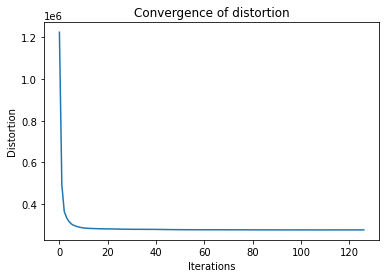

K-means converged after 127 iterations


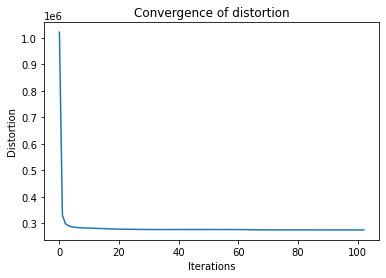

K-means converged after 103 iterations


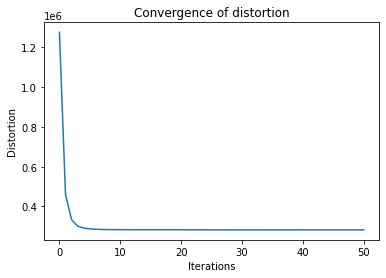

K-means converged after 51 iterations


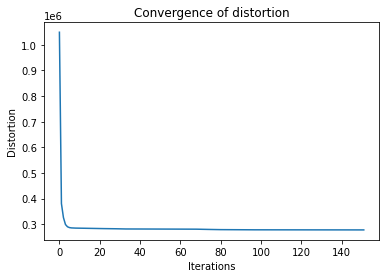

K-means converged after 152 iterations


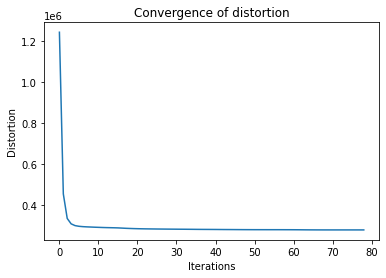

K-means converged after 79 iterations


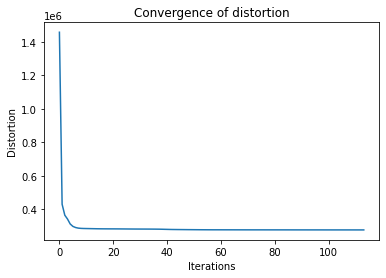

K-means converged after 114 iterations


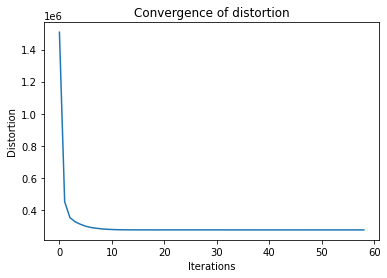

K-means converged after 59 iterations


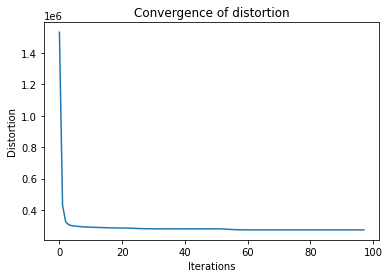

K-means converged after 98 iterations


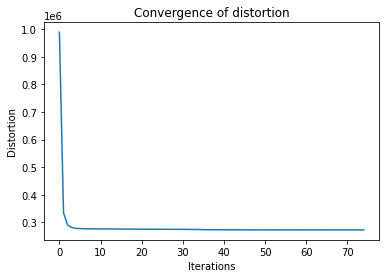

K-means converged after 75 iterations


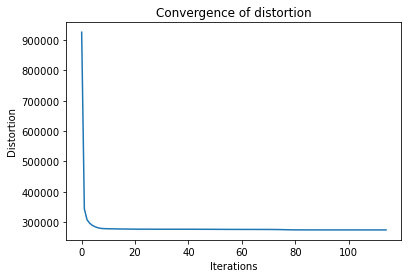

K-means converged after 115 iterations


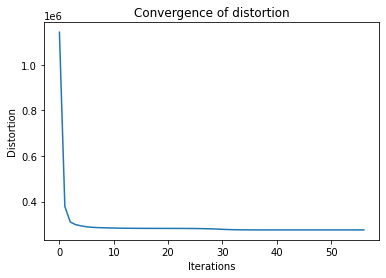

K-means converged after 57 iterations


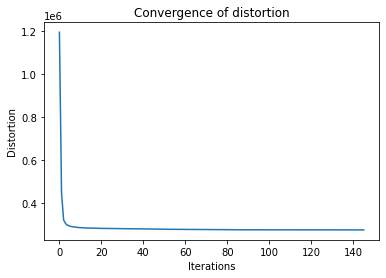

K-means converged after 146 iterations


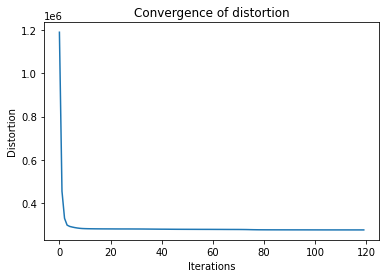

K-means converged after 120 iterations


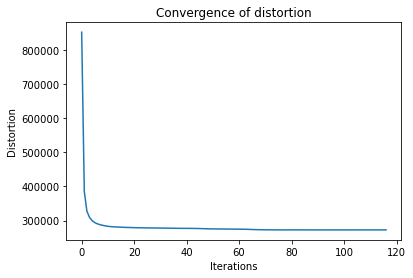

K-means converged after 117 iterations


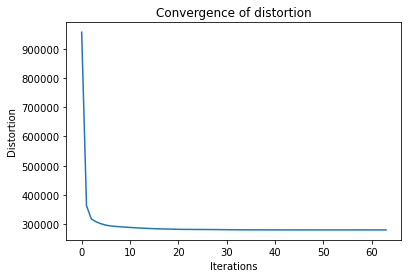

K-means converged after 64 iterations


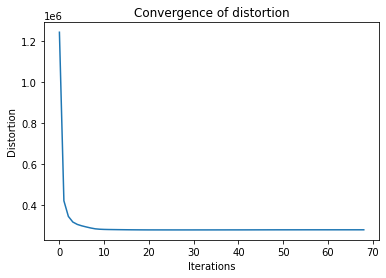

K-means converged after 69 iterations


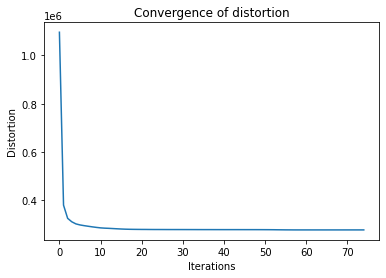

K-means converged after 75 iterations


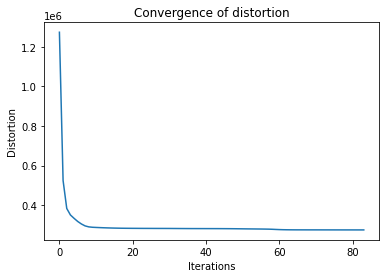

K-means converged after 84 iterations


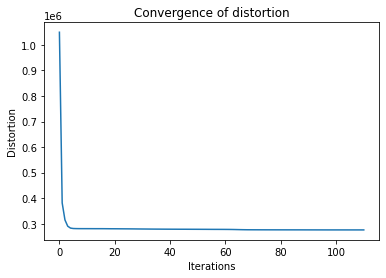

K-means converged after 111 iterations


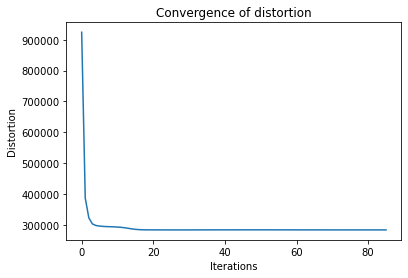

K-means converged after 86 iterations


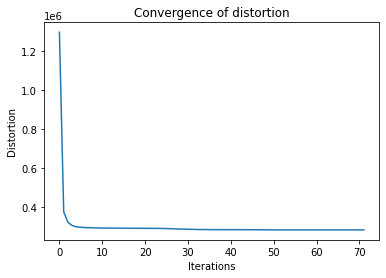

K-means converged after 72 iterations


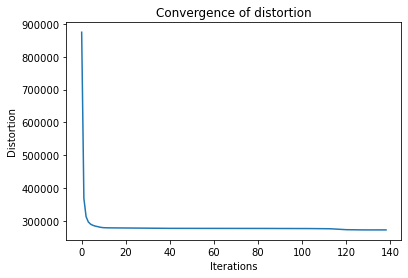

K-means converged after 139 iterations


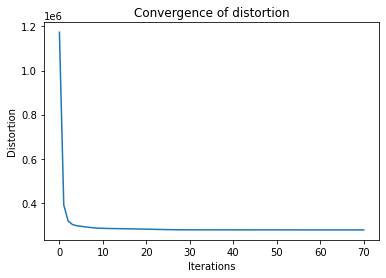

K-means converged after 71 iterations


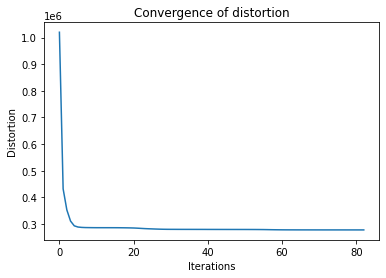

K-means converged after 83 iterations


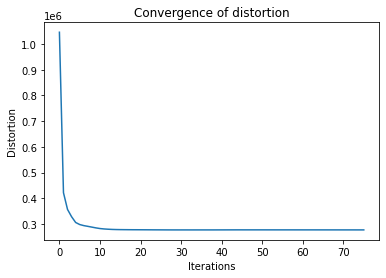

K-means converged after 76 iterations


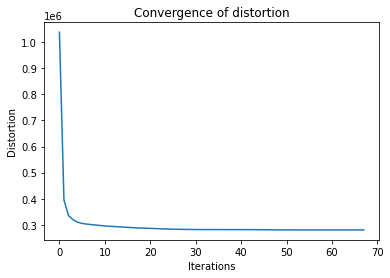

K-means converged after 68 iterations


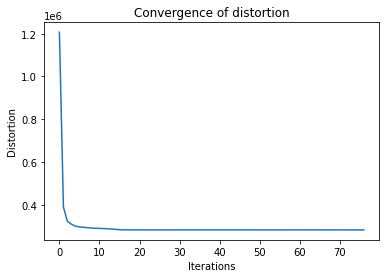

K-means converged after 77 iterations


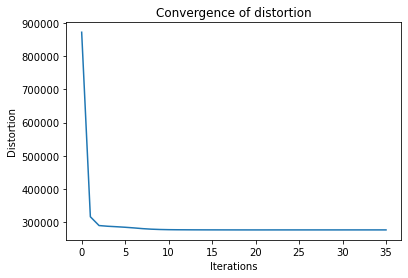

K-means converged after 36 iterations


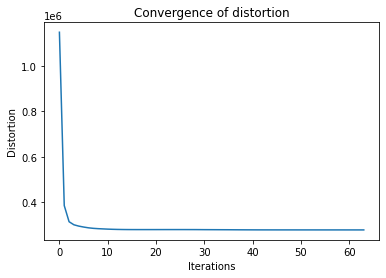

K-means converged after 64 iterations


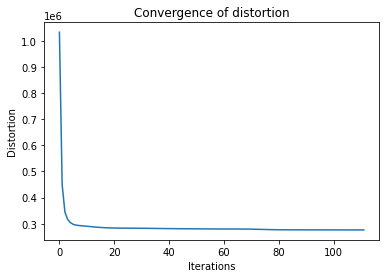

K-means converged after 112 iterations


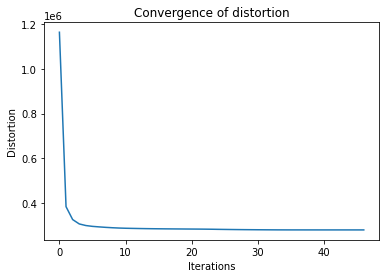

K-means converged after 47 iterations


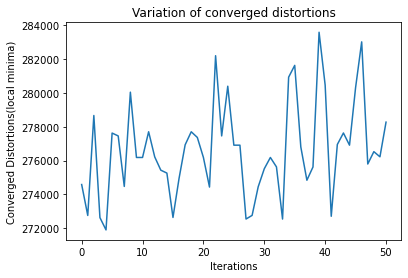

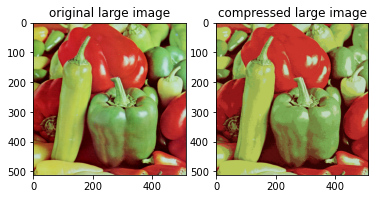

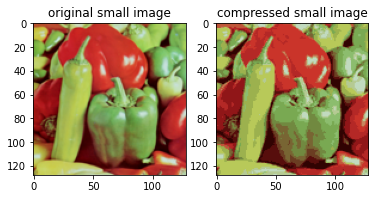

In [329]:
J_list1=[]
centroids_opt,Jmin=K_means(K,S)
J_list1.append(Jmin)
for i in range(50):
    centroids,J=K_means(K,S)
    
    if J<Jmin:
        centroids_opt,Jmin=centroids,J
        
    J_list1.append(J)

plt.figure()
plt.plot(J_list1)
plt.xlabel('Iterations')
plt.ylabel('Converged Distortions(local minima)')
plt.title('Variation of converged distortions')
plt.show()
        
        
        
compress(centroids_opt,L,S)